# Lecture 3: Qulitative Predictors & Interaction Terms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
data_path = "../data/"
credit = pd.read_csv(data_path + "Credit.csv", index_col=0)

## 3.1 레벨 수가 2인 범주형 설명변수 

In [2]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
credit.Student.value_counts()

Student
No     360
Yes     40
Name: count, dtype: int64


- 두 개의 가능한 값을 가지는 indicator variable (dummy variable)을 생성 
$$ d_i  = \left\{ \begin{matrix}
1 & i \mbox{번째 사람이 학생인 경우} \\
0 & i \mbox{번째 사람이 학생이 아닌 경우}
\end{matrix}
\right.$$

- 이 변수를 설명변수로 한 회귀식 
$$ y_i = \beta_0 + \beta_1 d_i + \epsilon_i$$

$$ y_i = \left\{ \begin{matrix}
\beta_0 + \beta_1 +\epsilon_i   & i \mbox{번째 사람이 학생인 경우} \\
\beta_0 + \epsilon_i  & i \mbox{번째 사람이 학생이 아닌 경우}
\end{matrix}
\right.$$

- $\beta_0$: 학생이 아닌 사람의 평균 신용카드 대금
- $\beta_0+ \beta_1$: 학생의 평균 신용카드 대금 
- $\beta_1$: 학생과 학생이 아닌 사람의 평균 신용카드 대금의 차이 

- 이 때 기준이 되는  __reference level__ 은 무엇인가?
   - 기준: Student = No인 그룹
   - 기준이 되는 level의 평균 balance: $\beta_0$
   - 기준이 되는 level에 비해 다른 level의 평균 balance가 얼만큼 큰가?: $\beta_1$
   

In [4]:
model = smf.ols('Balance ~ Student', data = credit)
model_fit = model.fit()
model_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,480.3694,23.434,20.499,0.000,434.300,526.439
Student[T.Yes],396.4556,74.104,5.350,0.000,250.771,542.140


- 이 때의 design matrix는? 

In [5]:
model.data.orig_exog

,Intercept,Student[T.Yes]
1,1.0,0.0
2,1.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
...,...,...
396,1.0,0.0
397,1.0,0.0
398,1.0,0.0
399,1.0,0.0


  
- $H_0: \beta_1=0$ 
    - "학생과 학생이 아닌 사람의 평균 신용카드 대금의 차이가 없다"라는 귀무가설 
    - p-value<0.05 이므로 두 집단 간의 유의한 통계적인 차이가 있다고 결론 
   

## 3.2 레벨 수가 3 이상인 범주형 설명변수 
- Ethnicity: 백인, 흑인, 아시아인 (레벨이 3개)
- 2개의 dummy variable 생성

$$ d_{1i}  = \left\{ \begin{matrix}
     1 & i \mbox{번째 사람이 아시아인 경우} \\
     0 & i \mbox{번째 사람이 아시아인이 아닌 경우 }
     \end{matrix}
     \right.$$
     
$$ d_{2i}  = \left\{ \begin{matrix}
     1 & i \mbox{번째 사람이 백인인 경우} \\
     0 & i \mbox{번째 사람이 백인이 아닌 경우 }
     \end{matrix}
     \right.$$
- 이 경우 reference level은 무엇인가?

- 이 변수를 설명변수로 한 각 그룹의 회귀식 
$$ y_i = \beta_0 + \beta_1 d_{1i} + \beta_2 d_{2i}  + \epsilon_i $$

$$ y_i = \left\{ \begin{matrix}
    \beta_0 + \beta_1 +\epsilon_i   & i \mbox{번째 사람이 아시아인인  경우} \\
    \beta_0 + \beta_2+ \epsilon_i  & i \mbox{번째 사람이 백인인  경우}\\
    \beta_0 + \epsilon_i  & i \mbox{번째 사람이 흑인인   경우}\\
    \end{matrix}
    \right.$$

    

In [6]:
credit.Ethnicity.value_counts()

Ethnicity
Caucasian           199
Asian               102
African American     99
Name: count, dtype: int64

In [7]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [8]:
model2 = smf.ols('Balance ~ Ethnicity ', data = credit)
model2_fit = model2.fit()
model2_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


In [12]:
model2_fit.summary()
# 귀무가설 기각이 안돼므로 귀무가설을 채택한다.=> 3개 집단의 평균이 같다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Wed, 27 Sep 2023   Prob (F-statistic):              0.957
Time:                        16:41:12   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from statsmodels.stats.anova import anova_lm
anova_lm(model2_fit)

,df,sum_sq,mean_sq,F,PR(>F)
Ethnicity,2.0,1.845420e+04,9227.100236,0.043443,0.957492
Residual,397.0,8.432146e+07,212396.618916,NaN,NaN


In [9]:
model2.data.orig_exog.head()

,Intercept,Ethnicity[T.Asian],Ethnicity[T.Caucasian]
1,1.0,0.0,1.0
2,1.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0
5,1.0,0.0,1.0



#### 기준이 되는 레벨(reference level)을 바꾸고 싶다면?


In [10]:
model3 = smf.ols('Balance ~ C(Ethnicity, Treatment(reference = "Asian")) ', data = credit)
model3_fit = model3.fit()
model3_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,512.3137,45.632,11.227,0.000,422.602,602.025
"C(Ethnicity, Treatment(reference=""Asian""))[T.African American]",18.6863,65.021,0.287,0.774,-109.142,146.515
"C(Ethnicity, Treatment(reference=""Asian""))[T.Caucasian]",6.1838,56.122,0.110,0.912,-104.149,116.517


In [11]:
model3.data.orig_exog.head()

,Intercept,"C(Ethnicity, Treatment(reference=""Asian""))[T.African American]","C(Ethnicity, Treatment(reference=""Asian""))[T.Caucasian]"
1,1.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,1.0


## 3.3 범주형 설명변수와 연속형 설명변수 
- 범주형 설명변수와 연속형 설명변수를 함께 사용한다면?
   

$$ y_i = \beta_0 + \beta_1 x_i + \beta_2 d_i +\epsilon_i $$

- `Student[T.Yes]`의 계수(382.67): Income이 동일한 수준일 때 학생과 학생 아닌 사람의 평균 신용카드 대금의 차이
    
- `Income`의 계수(5.98): Income이 1 증가할 때  Balance는 5.98 증가한다. (Student/non-student 공통) 

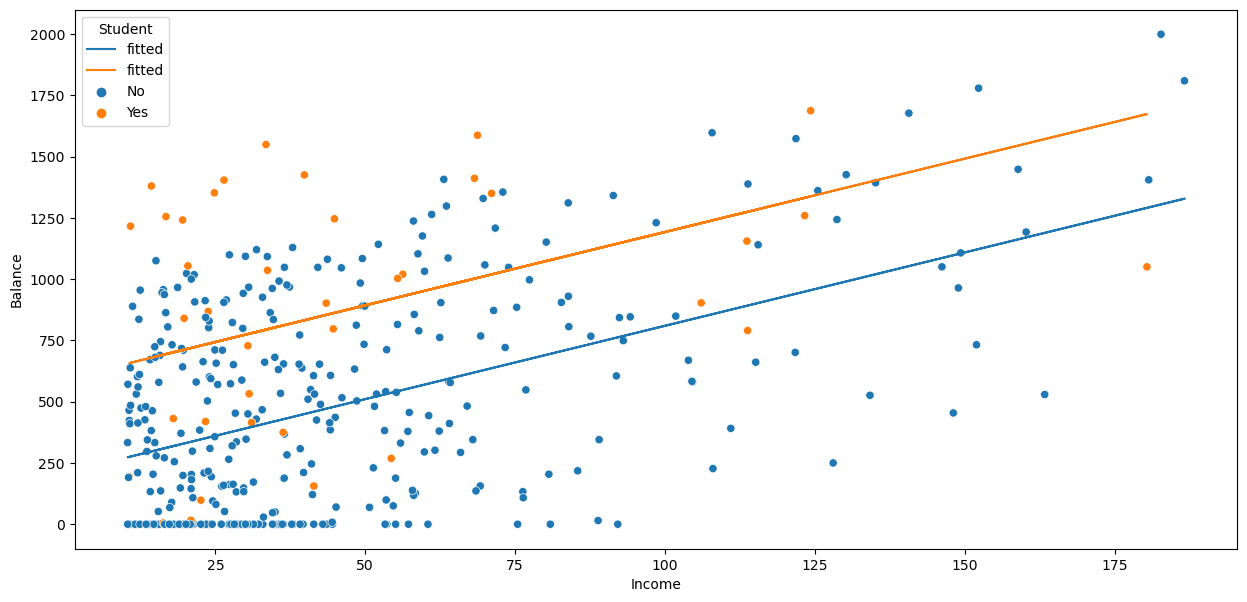

In [11]:
credit['fitted'] = model4.fittedvalues

import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))

credit.groupby('Student').plot(x='Income', y='fitted', 
                               ax=ax, legend=False)
sns.scatterplot(x= "Income", y="Balance", data=credit, hue="Student")
plt.show()

### 부분 F검정  

q개의 특정 계수가 0인지 검정하고 싶다면?  
$$H_0: \beta_{p-q+1}=\beta_{p-q+2} = \cdots= \beta_p=0 $$

- F 통계량 
$$F=\frac{(RSS_0 - RSS)/q}{RSS/(n-p-1)}$$

- $RSS_0$: 해당하는 q개의  계수를 제외한 모든 변수를 사용하는 모형에 대한 잔차제곱합 

- "각 회귀계수에 대한 t-검정" = "$q=1$인 경우의 F 검정" 

- 그 변수들을 추가하는 것에 대한 **부분적 효과**에 대한 검정 

In [12]:
from statsmodels.stats.anova import anova_lm
model5 = smf.ols('Balance ~ Income + Student + Ethnicity ', data = credit).fit()
model5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,206.7655,47.992,4.308,0.000,112.413,301.117
Student[T.Yes],384.2829,65.569,5.861,0.000,255.376,513.190
Ethnicity[T.Asian],-7.9309,55.464,-0.143,0.886,-116.973,101.111
Ethnicity[T.Caucasian],12.4020,48.338,0.257,0.798,-82.629,107.433
Income,5.9859,0.558,10.721,0.000,4.888,7.084


In [13]:
anova_lm(model4, model5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,397.0,6.093905e+07,0.0,NaN,NaN,NaN
1,395.0,6.090901e+07,2.0,30047.507138,0.09743,0.907187


## 3.4 Effect coding
- 경우에 따라 특정 level을 기준으로 비교하기 보다는 모든 집단의 평균으로부터 각 집단이 평균의 유의한 차이를 보이는지가 궁금할 수 있다.
- Design matrix를 어떻게 구성하면 좋을까?

$$ d_i  = \left\{ \begin{matrix}
1 & i \mbox{번째 사람이 학생이 아닌 경우} \\
-1 & i \mbox{번째 사람이 학생인 경우}
\end{matrix}
\right.$$

$$ y_i = \beta_0 + \beta_1 d_i + \epsilon_i $$
$$ y_i = \left\{ \begin{matrix}
\beta_0 + \beta_1 +\epsilon_i   & i \mbox{번째 사람이 학생이 아닌 경우} \\
\beta_0 - \beta_1 + \epsilon_i  & i \mbox{번째 사람이 학생인 경우}
\end{matrix}
\right.$$

- $\beta_0$: 학생 여부를 고려하지 않은 전체 평균 신용카드 대금
- $\beta_1$: 학생들은 평균보다 높고 학생이 아닌 사람들은 평균보다 낮은 신용카드 대금의 양 

    

In [14]:
model5 = smf.ols('Balance ~ Income + C(Student, Sum)', data = credit)
model5_fit = model5.fit()
model5_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,402.4782,41.540,9.689,0.000,320.812,484.144
"C(Student, Sum)[S.No]",-191.3353,32.655,-5.859,0.000,-255.534,-127.136
Income,5.9843,0.557,10.751,0.000,4.890,7.079


In [15]:
model5.data.orig_exog

,Intercept,"C(Student, Sum)[S.No]",Income
1,1.0,1.0,14.891
2,1.0,-1.0,106.025
3,1.0,1.0,104.593
4,1.0,1.0,148.924
5,1.0,1.0,55.882
...,...,...,...
396,1.0,1.0,12.096
397,1.0,1.0,13.364
398,1.0,1.0,57.872
399,1.0,1.0,37.728


## 3.5 선형모형의 확장: 교호작용(상호작용) 효과 (Interaction effect)

- 표준  선형모형은 TV와 radio 둘 다 sales와 상관관계가 있으나 한 광고매체의 지출 증가가 sales에 미치는 영향은 다른 매체에 대한 지출과 무관하다고 가정

- 라디오 광고지출이 TV 광고의 효과를 증가시킨다면? 고정 광고예산을 라디오와 TV에 절반씩 지출하는 것이 어느 한쪽에 모두 사용하는 것보다 판매량 증가가 더 클 수 있다.

- 교호작용 항의 추가 

\begin{eqnarray*}
Y&=&\beta_0+ \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1X_2 + \epsilon\\
&=& \beta_0 + (\beta_1 + \beta_3X_2 ) X_1 + \beta_2 X_2 +\epsilon\\
&=& \beta_0 + \tilde \beta_1 X_1 + \beta_2 X_2 +\epsilon
\end{eqnarray*}

In [16]:
ad=pd.read_csv(data_path + "Advertising.csv")
model_ad = smf.ols('Sales~TV+Radio+TV*Radio', data = ad).fit()
model_ad.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


    

- 교호작용 항이 유의함: 실제 상관관계가 가산적이지 않다는 증거
- TV광고지출이 1천 달러 증가하면 판매량은  $(\hat \beta_1 + \hat \beta_3 \times Radio) \times 1,000$ 유닛 증가
- 라디오 광고 지출이 1천달러 증가하면 판매량은  $(\hat \beta_2 + \hat \beta_3 \times TV) \times 1,000$ 유닛 증가 

- 교호작용항이 유의하지만 주효과(main effect: 여기서는 TV와 radio)가 유의하지 않은 경우 주효과를 제거해야 하는가?
    - 계층적 원리에 의해 교호작용을 포함하면  주효과가 유의하지 않더라도 모델에 포함 
    - $X_1 \times X_2$가 유의하면 $X_1$, $X_2$의 각 계수가 0인지는 관심 없음 
    - 주효과를 제외하면 교호작용의 의미를 바꾸는 경향이 있음 

### 범주형 변수와 연속형 변수 사이의 교호작용 
- 학생 여부에 따라 소득이 증가할 때 카드잔고가 증가하는 속도가 다를 수 있지 않을까? 즉, 학생 여부와 소득 간의 교호작용이 존재하지 않을까? 

- credit 데이터에서 income과 student 사이의 교호작용 고려 
$$ balance_i \approx \beta_0 + \beta_1 \times income_i + \beta_2 \times student + \beta_3 \times income_i \times student_i $$
 
<img src='http://drive.google.com/uc?export=view&id=1w5rLlYUrNqzNL-08pEHF47aZW1oZF7XI' width=600/><br>


In [17]:
model6 = smf.ols('Balance~(Income+Student)**2', data = credit).fit()
model6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,200.6232,33.698,5.953,0.000,134.373,266.873
Student[T.Yes],476.6758,104.351,4.568,0.000,271.524,681.827
Income,6.2182,0.592,10.502,0.000,5.054,7.382
Income:Student[T.Yes],-1.9992,1.731,-1.155,0.249,-5.403,1.404



- 교호작용 항이 통계적으로 유의하지 않으므로 학생 여부에 따라 소득의 기울기가 다르지 않다고 결론. 즉, 두 집단의 회귀식이 서로 평행.